In [1]:
import pandas as pd

df = pd.read_csv("../40_nico_investigation/abandoned_domains-domainId_AFplddt_ESMplddt.tsv", names="domainId_ColabFoldplddt_esmPlddt".split("_"), delimiter="\t", skiprows=1)
df.head()

,domainId,ColabFoldplddt,esmPlddt
0,MGYP000000014868_01,68.6125,84.04
1,MGYP000000021186_01,92.0100,67.34
2,MGYP000000024651_02,79.3784,83.71
3,MGYP000000024651_05,44.3834,95.80
4,MGYP000000030326_02,79.8380,79.06


Loading data...
Data loaded. Total points: 2,313,951
Initializing plot...
Generating 2D density plot (hexbin)...
Generating marginal histograms...
Adjusting axis limits...
Adding labels and reference lines...
Saving figure to 'output/Colab-ESM.svg'...
✅ Plot generated successfully! 🎉


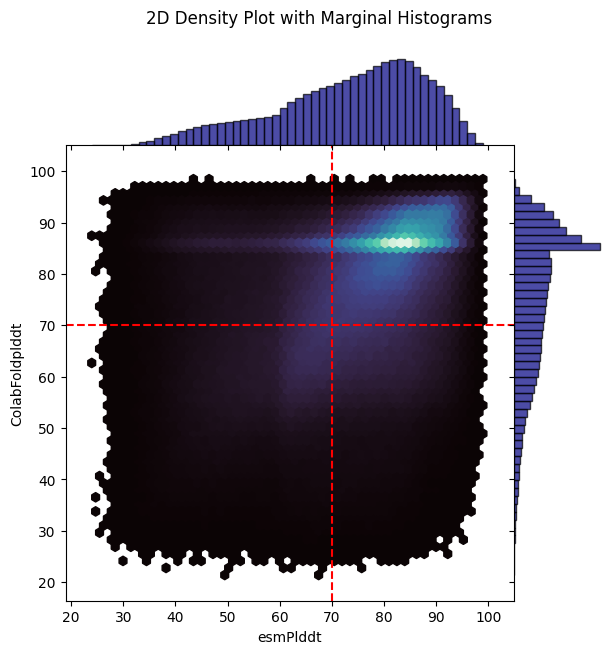

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Loading data...")
x = df["esmPlddt"].values  # Convert to NumPy for speed
y = df["ColabFoldplddt"].values

print(f"Data loaded. Total points: {len(x):,}")

# Initialize JointGrid
print("Initializing plot...")
g = sns.JointGrid(x=x, y=y, space=0, height=6)

# Use Hexbin for fast density visualization
print("Generating 2D density plot (hexbin)...")
g.plot_joint(
    plt.hexbin, 
    gridsize=50,  # Increase grid size for better resolution
    cmap="mako", 
    mincnt=1  # Avoids empty bins looking white
)

# Faster histograms using NumPy
print("Generating marginal histograms...")
hist_kwargs = dict(bins=50, color="navy", alpha=0.7, edgecolor="black")
g.ax_marg_x.hist(x, **hist_kwargs)
g.ax_marg_y.hist(y, orientation="horizontal", **hist_kwargs)

# Set axis limits
print("Adjusting axis limits...")
xmin, xmax = x.min() - 5, 105
ymin, ymax = y.min() - 5, 105
g.ax_joint.set_xlim([xmin, xmax])
g.ax_joint.set_ylim([ymin, ymax])
g.ax_marg_x.set_xlim([xmin, xmax])
g.ax_marg_y.set_ylim([ymin, ymax])

# Labels and title
print("Adding labels and reference lines...")
g.figure.suptitle("2D Density Plot with Marginal Histograms", y=1.05)
g.ax_joint.set_xlabel("esmPlddt")
g.ax_joint.set_ylabel("ColabFoldplddt")

# Add reference lines at 70
g.ax_joint.axhline(y=70, color='red', linestyle='--', linewidth=1.5)
g.ax_joint.axvline(x=70, color='red', linestyle='--', linewidth=1.5)

# Save output
print("Saving figure to 'output/Colab-ESM.svg'...")
plt.savefig('output/Colab-ESM.svg', bbox_inches='tight')

print("✅ Plot generated successfully! 🎉")